In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import os, plotly
import plotly.express as px
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd

import datetime
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
%matplotlib inline

In [3]:
proj_path = Path(os.getcwd()); print(proj_path)

C:\Users\Mo\OneDrive\Notes\CMU\02712\02-712-Bird-Migration


In [4]:
# Load directly
df = pd.read_csv(proj_path.parent/"Fall migration of white storks in 2014-gps_processed.csv")
df = df.set_index(["individual-local-identifier", "timestamp"])
df.head(2)

Latitude  Longitude  \
individual-local-identifier   timestamp                                       
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000  47.751562   8.931490   
                              2014-08-01 02:06:26.000  47.751563   8.931501   

                                                       Temperature  \
individual-local-identifier   timestamp                              
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000         16.0   
                              2014-08-01 02:06:26.000         16.0   

                                                       ground-speed  heading  \
individual-local-identifier   timestamp                                        
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000          0.07     0.00   
                              2014-08-01 02:06:26.000          0.20   206.44   

                                                            delta_time  \
individual-local-identifier   timestamp                                  
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000  0 days 00:05:03   
                              2014-08-01 02:06:26.000  0 days 00:05:00   

                                                       delta_time(s)  
individual-local-identifier   timestamp                               
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000          303.0  
                              2014-08-01 02:06:26.000          300.0

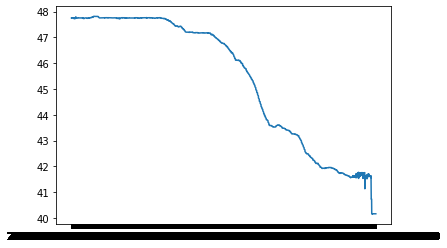

In [5]:
plt.plot(df.loc["Balou / DER AN916 (eobs 3913)"]["Latitude"])

### Prepare dataset

In [4]:
df_data = pd.read_csv(proj_path.parent/"Fall migration of white storks in 2014-gps.csv")
df_data.describe(include='all')

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
count,7.169458e+06,7169458,7169458,7.165703e+06,7.165703e+06,16299,7.169458e+06,7.151294e+06,7.147554e+06,7.155667e+06,...,7.151294e+06,7.151294e+06,7.147554e+06,7.147554e+06,7.147554e+06,7169458,7169458,7.169458e+06,7169458,7169458
unique,NaN,2,1047340,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,60,1
top,NaN,True,2014-08-02 18:00:41.000,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ciconia ciconia,NaN,Nils / DER AU058 (eobs 3335),Fall migration of white storks in 2014
freq,NaN,7153159,95,NaN,NaN,16299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7169458,7169458,NaN,271936,7169458
mean,3.974416e+09,NaN,NaN,6.502634e+00,4.579975e+01,NaN,3.962742e+03,3.936425e+03,2.442615e+00,2.146645e+09,...,2.998431e+00,1.142350e+02,5.294188e+00,1.695921e+02,6.460537e+02,NaN,NaN,3.620292e+03,NaN,NaN
std,2.071792e+06,NaN,NaN,3.263060e+00,3.041946e+00,NaN,1.164629e+02,1.156504e+02,3.097515e+00,1.240351e+09,...,6.858848e-02,8.542325e+01,6.040453e+00,1.127272e+02,4.000380e+02,NaN,NaN,3.865244e+02,NaN,NaN
min,3.970814e+09,NaN,NaN,-1.174656e+01,1.561229e+01,NaN,3.659000e+03,3.645000e+03,7.700000e-01,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-1.048100e+03,NaN,NaN,2.647000e+03,NaN,NaN
25%,3.972625e+09,NaN,NaN,4.394686e+00,4.357885e+01,NaN,3.850000e+03,3.825000e+03,1.540000e+00,1.072677e+09,...,3.000000e+00,4.400000e+01,4.000000e-02,5.767000e+01,4.538000e+02,NaN,NaN,3.337000e+03,NaN,NaN
50%,3.974417e+09,NaN,NaN,8.100508e+00,4.720818e+01,NaN,4.003000e+03,3.974000e+03,1.790000e+00,2.147032e+09,...,3.000000e+00,9.500000e+01,6.100000e-01,1.913700e+02,5.023000e+02,NaN,NaN,3.908000e+03,NaN,NaN
75%,3.976210e+09,NaN,NaN,8.919020e+00,4.775109e+01,NaN,4.063000e+03,4.038000e+03,2.300000e+00,3.220364e+09,...,3.000000e+00,1.750000e+02,1.050000e+01,2.608300e+02,7.724000e+02,NaN,NaN,3.929000e+03,NaN,NaN


In [5]:
df_data.head(2)

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,3973589512,True,2014-08-01 02:01:23.000,8.931490,47.751562,NaN,4033,4008.0,3.84,3.207013e+09,...,3.0,23.0,0.07,0.00,461.8,gps,Ciconia ciconia,3913,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014
1,3971796332,True,2014-08-01 02:06:26.000,8.931501,47.751563,NaN,4030,4011.0,5.63,3.675634e+09,...,3.0,5.0,0.20,206.44,473.2,gps,Ciconia ciconia,3913,Balou / DER AN916 (eobs 3913),Fall migration of white storks in 2014


In [6]:
def df_process(df_data=df_data):
    df_data_processed = df_data.dropna(subset=['timestamp', 'location-long','ground-speed','location-lat','event-id'])
    dt = pd.to_datetime(df_data_processed[['timestamp']].stack(), format='%Y-%m-%d %H:%M:%S')
    df_data_processed['timestamp'] = dt.droplevel(level=1)
    df_data_processed = df_data_processed.sort_values(["individual-local-identifier","timestamp"]).set_index(["individual-local-identifier"])
    # add time diff
    df_data_processed = df_data_processed.rename(columns = {
        'location-lat':'Latitude', 'location-long':'Longitude',"eobs:temperature":"Temperature"})
    cols_to_care = ["timestamp","Latitude","Longitude","Temperature","ground-speed","heading"]
    return df_data_processed[cols_to_care]

def df_engineer(df_process):
    df_final = df_process.copy()
    df_final["delta_time"] = df_data_processed.groupby(level=0)["timestamp"].diff(1).shift(-1)
    df_final['delta_time(s)'] = df_final['delta_time'].apply(lambda x: x.total_seconds())
    df_final = df_final.dropna(subset=["delta_time(s)"]).set_index("timestamp", append=True)
    return df_final
df_data_processed = df_process(df_data); df_data_processed.head(2)
df = df_engineer(df_data_processed); df.head(2)

C:\Users\Mo\AppData\Local\Temp/ipykernel_8608/3437734534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_processed['timestamp'] = dt.droplevel(level=1)


Latitude  Longitude  \
individual-local-identifier   timestamp                                   
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23  47.751562   8.931490   
                              2014-08-01 02:06:26  47.751563   8.931501   

                                                   Temperature  ground-speed  \
individual-local-identifier   timestamp                                        
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23         16.0          0.07   
                              2014-08-01 02:06:26         16.0          0.20   

                                                   heading      delta_time  \
individual-local-identifier   timestamp                                      
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23     0.00 0 days 00:05:03   
                              2014-08-01 02:06:26   206.44 0 days 00:05:00   

                                                   delta_time(s)  
individual-local-identifier   timestamp                           
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23          303.0  
                              2014-08-01 02:06:26          300.0

In [29]:
df.describe(include='all', datetime_is_numeric=True)

,Latitude,Longitude,Temperature,ground-speed,heading,delta_time,delta_time(s)
count,7.147494e+06,7.147494e+06,7.147494e+06,7.147494e+06,7.147494e+06,7147494,7.147494e+06
mean,4.580621e+01,6.510432e+00,1.646490e+01,5.294227e+00,1.695926e+02,0 days 00:00:34.145634119,3.414563e+01
std,3.031360e+00,3.249963e+00,9.560914e+00,6.040460e+00,1.127268e+02,0 days 00:08:19.030260510,4.990303e+02
min,1.561229e+01,-1.174656e+01,-1.400000e+01,0.000000e+00,0.000000e+00,0 days 00:00:00.800000,8.000000e-01
25%,4.357908e+01,4.402144e+00,1.000000e+01,4.000000e-02,5.767000e+01,0 days 00:00:01,1.000000e+00
50%,4.720928e+01,8.100535e+00,1.600000e+01,6.100000e-01,1.913700e+02,0 days 00:00:01,1.000000e+00
75%,4.775109e+01,8.919027e+00,2.200000e+01,1.050000e+01,2.608300e+02,0 days 00:00:01,1.000000e+00
max,4.785431e+01,9.145732e+00,7.700000e+01,3.262300e+02,3.597900e+02,3 days 06:30:17,2.826170e+05


In [ ]:
df.to_csv(proj_path.parent/"Fall migration of white storks in 2014-gps_processed.csv")
print("saved to:", proj_path.parent)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

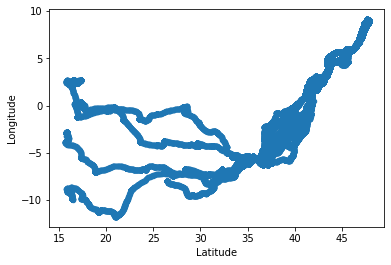

In [7]:
df.plot.scatter(x="Latitude", y="Longitude")

### Exploratory

In [9]:
geometry = [Point(xy) for xy in zip(df["Latitude"], df["Longitude"])]
gdf = GeoDataFrame(df[["Longitude","Longitude"]], geometry=geometry)
gdf.head(2)

Longitude  Longitude  \
individual-local-identifier   timestamp                                       
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000   8.931490   8.931490   
                              2014-08-01 02:06:26.000   8.931501   8.931501   

                                                                       geometry  
individual-local-identifier   timestamp                                          
Balou / DER AN916 (eobs 3913) 2014-08-01 02:01:23.000  POINT (47.75156 8.93149)  
                              2014-08-01 02:06:26.000  POINT (47.75156 8.93150)

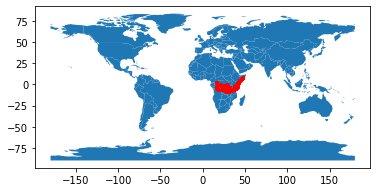

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1,1)
world_ax = world.plot(figsize=(15,8), ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=2)
fig.savefig(proj_path/"WhereTheBirds_World.jpg")

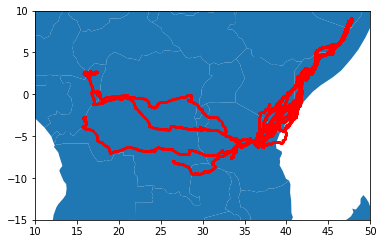

In [11]:
fig, ax = plt.subplots(1,1)
world_ax = world.plot(figsize=(15,8), ax=ax)
ax.set_xlim([10,50]); ax.set_ylim([-15,10])
gdf.plot(ax=ax, marker='o', color='red', markersize=1)
fig.savefig(proj_path/"WhereTheBirds_Africa.jpg")

### HMM

In [4]:
from hmmlearn.hmm import GaussianHMM

In [17]:
bird_no = 2
print("fitting to HMM and decoding ...", end="")
x = df.loc[df.index.get_level_values(0).unique()[bird_no]][["Latitude","Longitude","Temperature","ground-speed","delta_time(s)"]]
# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X = x)

fitting to HMM and decoding ...

In [18]:
# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(x)
print("done")

done


Transition matrix
[[9.94063599e-001 3.39637861e-005 5.90243767e-003 5.05650671e-023]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [1.25480968e-001 6.50198606e-003 8.51412170e-001 1.66048761e-002]
 [1.02990602e-100 1.21165121e-306 5.70490047e-002 9.42950995e-001]]
Means and vars of each hidden state
0th hidden state
mean =  [47.7699086   8.90021932 19.09358147  4.53119938  1.        ]
var =  [1.32049712e-03 1.75067862e-03 6.18887724e+01 3.24024258e+01
 3.41772347e-07]
1th hidden state
mean =  [4.77585221e+01 8.92489269e+00 1.64000000e+01 4.36000000e-01
 1.97964000e+04]
var =  [1.43594035e-03 1.37370667e-03 2.24100000e+00 2.29184000e-01
 5.77084100e+03]
2th hidden state
mean =  [ 47.74933511   8.91956373  23.45416397   0.65797776 504.55729048]
var =  [6.03252460e-04 6.08849944e-04 7.22947711e+01 3.91086388e+00
 9.64372565e+04]
3th hidden state
mean =  [47.7325634   8.91718296 21.64545416 11.80025753  9.98877796]
var =  [8.89102859e-05 1.47690198e-04 1.87759342e+01 

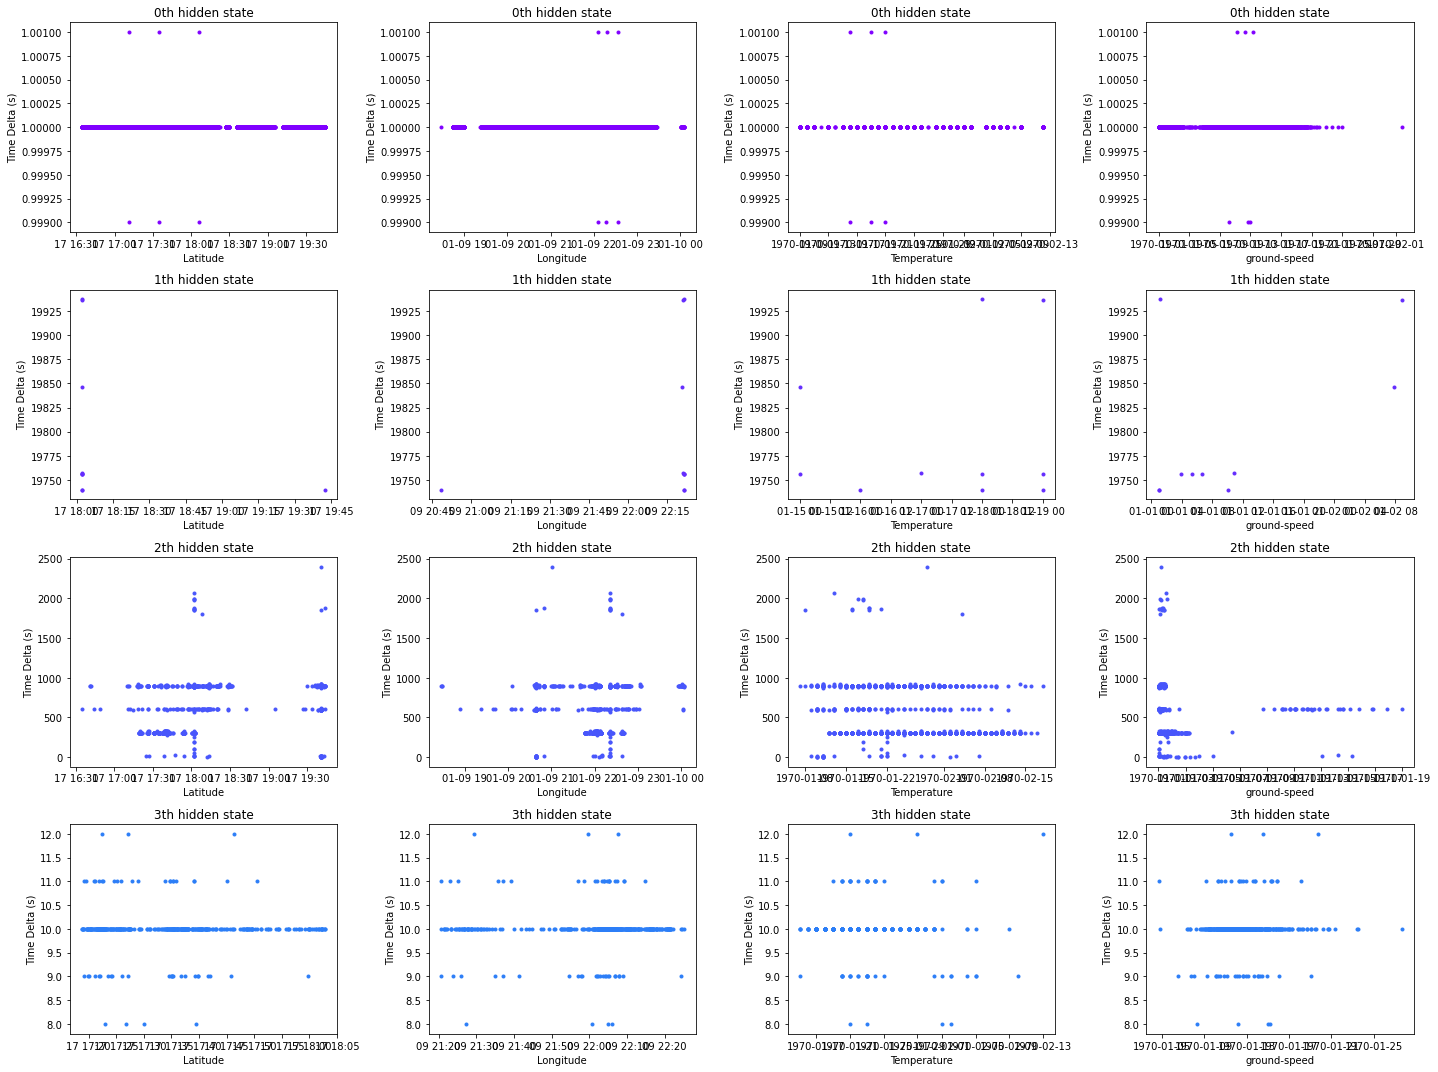

In [22]:
print("Transition matrix")
print(model.transmat_)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))


fig, axs = plt.subplots(model.n_components, len(x.columns)-1, figsize=(20,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components*len(x.columns)-1))
for n, col_name in enumerate(x.columns[:-1]):
    ax = axs[:,n]
    for i, (ax, colour) in enumerate(zip(ax, colours)):
        # Use fancy indexing to plot data in each state.
        mask = hidden_states == i
    
        ax.plot_date(x[col_name][mask], x["delta_time(s)"][mask], ".", c=colour)
        ax.set_title("{0}th hidden state".format(i))
        ax.set_xlabel(col_name)
        ax.set_ylabel("Time Delta (s)")
    
    # Format the ticks.
    #ax.xaxis.set_major_locator(YearLocator())
    #ax.xaxis.set_minor_locator(MonthLocator())

    #ax.grid(True)
fig.tight_layout()
plt.show()
fig.savefig(proj_path/("HMM_hidden_bird"+str(bird_no)+".jpg"))

### Positions Encoding

In [6]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.cluster import KMeans
import colorsys

In [7]:
n_clusters = np.arange(30, 35, 5); l = {}
x_loc = df[["Latitude","Longitude"]][1:]
dt = df["delta_time(s)"]
dt_scaler = dt/(dt.max()-dt.min())
for n in n_clusters:
    km = KMeans(n_clusters=n)
    km.fit(x_loc, dt_scaler[1:])
    l[n] = km.inertia_
print("Done...")

Done...


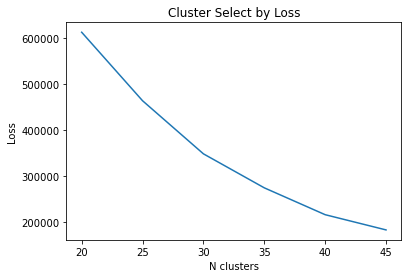

In [35]:
fig, ax = plt.subplots(1,1)
x,y = zip(*l.items())
ax.plot(x,y)
ax.set_xlabel("N clusters"); ax.set_ylabel("Loss"); ax.set_title("Cluster Select by Loss")
fig.savefig(proj_path/"Weighted Cluster select by loss (20-50).jpg")

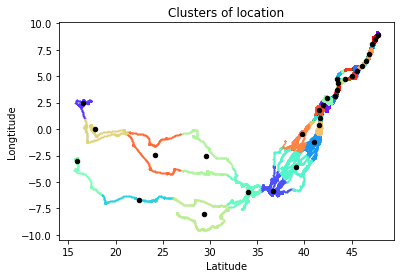

In [8]:
y_kmeans = km.predict(x_loc); n_c = len(np.unique(y_kmeans))
colours = cm.rainbow(np.linspace(0, 1, n_c))
for i_c, color in zip(range(n_c), colours):
    plt.scatter(x_loc.iloc[y_kmeans==i_c, 0], x_loc.iloc[y_kmeans==i_c, 1],marker=".",
                s=1, c=[color])
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=20, c='black', label = 'Centroids')
plt.title('Clusters of location'); plt.xlabel('Latitude'); plt.ylabel('Longtitude')
plt.savefig(proj_path/"kmeans of locations")